실행 후 재시작

In [5]:
! pip install kss konlpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 1.8 MB/s 
     |████████████████████████████████| 19.4 MB 545 kB/s 
     |████████████████████████████████| 131 kB 64.2 MB/s 
     |████████████████████████████████| 453 kB 55.8 MB/s 
  Created wheel for kss: filename=kss-3.4.3-py3-none-any.whl size=42448068 sha256=79ff6019b7b02bcbc24d6f44a692003631cbabc7d88a0886be800ecbba573c4c
  Stored in directory: /root/.cache/pip/wheels/10/df/7d/0d0a58843aa7d267687671cf57274080bcfe8f79d59ed8f399
Successfully built kss
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives

수집한 data를 EDA하시오. 단 워드클라우드를 이용하여 리뷰별 핵심 단어를 시각화

In [9]:
import pandas as pd
t_data = pd.read_table('ratings_train.txt')[['document', 'label']]
tt_data = pd.read_table('ratings_test.txt')[['document', 'label']]

In [2]:
t_data.shape, tt_data.shape

((150000, 2), (50000, 2))

In [5]:
t_data['document'].nunique(),tt_data['document'].nunique()  #중복된 데이터가 있음

(146182, 49157)

In [10]:
t_data.drop_duplicates(subset=['document'], inplace=True) #document에 빵꾸가 생겼을 것. 나중에 dropna any로 하면 그 인스턴스가 사라질 것

In [11]:
import numpy as np

In [12]:
t_data['document'] = t_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
t_data['document'] = t_data['document'].str.replace('^ +', '')
t_data['document'] = t_data['document'].replace('', np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [10]:
t_data.isnull().sum()

document    790
label         0
dtype: int64

In [13]:
t_data = t_data.dropna(how='any')

In [14]:
t_data.isnull().sum()

document    0
label       0
dtype: int64

In [15]:
#테스트 데이터도 한다.
tt_data.drop_duplicates(subset=['document'], inplace=True)
tt_data['document'] = tt_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
tt_data['document'] = tt_data['document'].str.replace('^ +', '')
tt_data['document'] = tt_data['document'].replace('', np.nan)
tt_data = tt_data.dropna(how='any')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [16]:
tt_data.isnull().sum()

document    0
label       0
dtype: int64

In [15]:
t_data #0이 부정, 1이 긍정 리뷰이다.

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...
149995,인간이 문제지 소는 뭔죄인가,0
149996,평점이 너무 낮아서,1
149997,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
149998,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [22]:
x_data = t_data['document']
y_data = t_data['label']

In [46]:
t_data['label'][10000]

1

In [17]:
t_data.reset_index(drop = True, inplace=True)

In [51]:
t_data['document'][0]

'아 더빙 진짜 짜증나네요 목소리'

토큰

In [17]:
stopwords=['의','기','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
! pip install kss konlpy

In [24]:
from konlpy.tag import Okt
okt = Okt()
t_x = []
for sentence in x_data:
    m_x = okt.morphs(sentence, stem=True)
    t_x.append([i for i in m_x if i not in stopwords])
t_x[0]

['아', '더빙', '진짜', '짜증나다', '목소리']

In [2]:
import pickle
#pickle.dump(t_x, open('t_data.p','wb'))
#pickle.dump(end_tt_data, open('tt_data.p', 'wb'))

In [ ]:
#형태소 분석한 tx 불러오기
#p_t_x = pickle.load(open('t_data.p', 'rb'))

시각화

In [53]:
po_review = []
ne_review = []
for i in range(len(t_data)):
    noun = okt.nouns(t_data['document'][i])
    if t_data['label'][i] == 1:
        po_review.extend([w for w in noun if w not in stopwords])
    else:
        ne_review.extend([w for w in noun if w not in stopwords])

In [54]:
from nltk import Text
positive = Text(po_review, name = 'positive')
negative = Text(ne_review, name = 'negative')

In [65]:
pickle.dump(positive, open('positive.p', 'wb'))
pickle.dump(negative, open('negative.p', 'wb'))

In [3]:
# #긍정, 부정 명사모음 불러오기
positive_l = pickle.load(open('positive.p','rb'))
negative_l = pickle.load(open('negative.p','rb'))

(-0.5, 999.5, 599.5, -0.5)

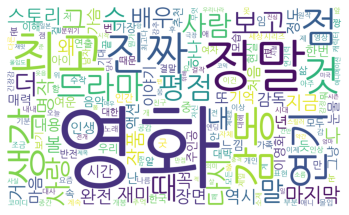

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc=WordCloud(font_path='NanumGothic',width=1000,height=600,background_color='white')
plt.imshow(wc.generate_from_frequencies(positive_l.vocab()))
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

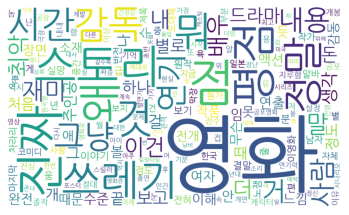

In [7]:
wc=WordCloud(font_path='NanumGothic',width=1000,height=600,background_color='white')
plt.imshow(wc.generate_from_frequencies(negative_l.vocab()))
plt.axis('off')

In [19]:
from wordcloud import WordCloud, STOPWORDS
i_wc = WordCloud(font_path='NanumGothic', max_words=2000).generate('  '.join(t_data[t_data.label == 1].document))

(-0.5, 399.5, 199.5, -0.5)

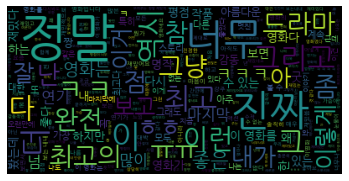

In [21]:
st_w = set(STOPWORDS)
st_w.add('영화')
i_wc = WordCloud(stopwords=st_w,font_path='NanumGothic', max_words=2000).generate('  '.join(t_data[t_data.label == 1].document))
plt.imshow(i_wc)
plt.axis('off')

In [23]:
stopwords=['의','기','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [24]:
from konlpy.tag import Okt
from tqdm import tqdm
okt = Okt()
t_l = []
for sentence in tqdm(t_data['document']):
    temp_X = okt.morphs(sentence, stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]
    t_l.append(' '.join(temp_X))

100%|██████████| 145393/145393 [06:21<00:00, 381.46it/s]


In [25]:
okt = Okt()
tt_l = []
for sentence in tqdm(tt_data['document']):
    temp_X = okt.morphs(sentence, stem = True)
    temp_X = [word for word in temp_X if not word in stopwords]
    tt_l.append(' '.join(temp_X))


100%|██████████| 48852/48852 [02:02<00:00, 398.32it/s]


In [28]:
t_l

['아 더빙 진짜 짜증나다 목소리',
 '흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍다 않다',
 '너 무재 밓었 다그 래서 보다 추천 다',
 '교도소 이야기 구먼 솔직하다 재미 없다 평점 조정',
 '사이 몬페 그 익살스럽다 연기 가 돋보이다 영화 스파이더맨 에서 늙다 보이다 커스틴 던스트 가 너무나도 이쁘다 보이다',
 '막 걸음 마 떼다 세 부터 초등학교 학년 생인 살다 영화 ㅋㅋㅋ 별 반개 아깝다 움',
 '원작 긴장감 을 제대로 살리다',
 '별 반개 아깝다 욕 나오다 이응경 길용우 연 생활 몇 년 인지 정말 발 로 해도 그것 보단 낫다 납치 감금 만 반복 반복 드라마 가족 없다 연기 못 사람 만 모 엿 네',
 '액션 없다 재미 있다 몇 안되다 영화',
 '왜케 평점 낮다 꽤 볼 만 데 헐리우드 식 화려하다 너무 길들이다 있다',
 '인피니트 가 짱 이다 진짜 짱 이다',
 '볼때 마다 눈물나다 죽다 년대 향수 극 허진호 감성 절제 멜로 달인 이다',
 '울면 서 손 고 횡단보도 건너다 때 뛰다 치다 올 뻔 이범수 연기 드럽다 못',
 '담백하다 깔끔하다 좋다 신 문 사 로만 보다 보다 자꾸 잊어버리다 그 사람 이다 것 을',
 '취향 존중 다지 만 진짜 내생 극장 에서 보다 영화 중 가장 노잼 노 감동 임 스토리 어거지 고 감동 어거지',
 'ㄱ 냥 매번 긴장 되다 재밋음 ㅠㅠ',
 '차다 사람 웃기다 바스코 가 이기 면 락스 코 라고 끄다 바비 가 이기 면 아이돌 이라고 깔다 다그 냥 끄다 안달 난 것 처럼 보이다',
 '굿바이 레닌 표절 인 것 이해 왜 뒤 로 갈수록 재미 없어지다',
 '이건 정말 깨알 캐스팅 질퍽 하 지 않다 산뜻하다 내 용구성 자다 버무러진 깨알 일드',
 '약탈 위 변명 이르다 저 놈 착하다 놈 절대 아니다 걸 요',
 '나름 심오하다 뜻 있다 듯 그냥 학생 선생 놀다 영화 절대 아니다',
 '보다 웃다 않다 건 불가능하다',
 '재미없다 지루하다 같다 음식 영화 인데 바베트 만찬 하고 넘다 차이 남바 베트 만찬

In [29]:
tr_df = t_data
tr_df

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1
...,...,...
145388,인간이 문제지 소는 뭔죄인가,0
145389,평점이 너무 낮아서,1
145390,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,0
145391,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,1


In [30]:
tr_df.document = t_l

In [31]:
tr_df

,document,label
0,아 더빙 진짜 짜증나다 목소리,0
1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍다 않다,1
2,너 무재 밓었 다그 래서 보다 추천 다,0
3,교도소 이야기 구먼 솔직하다 재미 없다 평점 조정,0
4,사이 몬페 그 익살스럽다 연기 가 돋보이다 영화 스파이더맨 에서 늙다 보이다 커스틴...,1
...,...,...
145388,인간 문제 지 소 뭔 죄인 가,0
145389,평점 너무 낮다,1
145390,게 뭐 요 한국인 거들다 먹거리 고 필리핀 혼혈 착하다,0
145391,청춘 영화 최고봉 방황 우울하다 날 자화상,1


In [32]:
tr_df.isnull().sum()

document    0
label       0
dtype: int64

In [33]:
ttr_df = tt_data
ttr_df.document = tt_l

In [34]:
ttr_df.isnull().sum()

document    0
label       0
dtype: int64

In [35]:
t_l_0 = tr_df[tr_df.label == 0].document.str.len()
t_l_1 = tr_df[tr_df.label == 1].document.str.len()

In [36]:
t_l_0, t_l_1

(0         16
 2         21
 3         27
 5         46
 6         16
           ..
 145383    12
 145385    78
 145388    16
 145390    30
 145392    23
 Name: document, Length: 73043, dtype: int64, 1         32
 4         65
 8         20
 9         39
 10        19
           ..
 145384    51
 145386    18
 145387    34
 145389     8
 145391    23
 Name: document, Length: 72350, dtype: int64)

In [37]:
t_l_0 = tr_df[tr_df.label == 0].document.str.split().map(lambda x: len(x))
t_l_1 = tr_df[tr_df.label == 1].document.str.split().map(lambda x: len(x))

In [38]:
t_l_0, t_l_1

(0          5
 2          8
 3          8
 5         16
 6          5
           ..
 145383     5
 145385    26
 145388     7
 145390    10
 145392     8
 Name: document, Length: 73043, dtype: int64, 1         11
 4         18
 8          7
 9         13
 10         7
           ..
 145384    15
 145386     6
 145387    11
 145389     3
 145391     7
 Name: document, Length: 72350, dtype: int64)

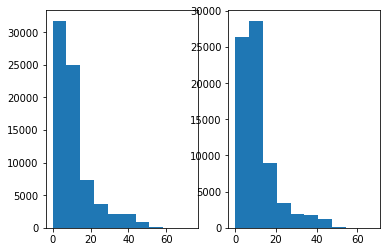

In [39]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(t_l_0)
ax2.hist(t_l_1)
plt.show()

n그램 함수

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
def N그램화(글자문서, 표현단어개수, n그램값):
    tv = CountVectorizer(ngram_range = (n그램값,n그램값)).fit(글자문서)
    BoW = tv.transform(글자문서)
    sum_BoW = BoW.sum(axis = 0)
    w_f = [(w,sum_BoW[0,i])for w,i in tv.vocabulary_.items()]
    w_f = sorted(w_f, key = lambda x: x[1], reverse = True)
    return w_f[:표현단어개수]


In [45]:
N그램화(tr_df.document, 10, 1)

[[36  9  1 ...  1  2  1]]


[('영화', 50367),
 ('보다', 41072),
 ('없다', 15572),
 ('이다', 13196),
 ('있다', 12429),
 ('좋다', 12001),
 ('너무', 11124),
 ('정말', 9720),
 ('되다', 8852),
 ('재밌다', 8802)]

In [47]:
N그램화(tr_df.document, 10, 2)

[('영화 보다', 2449),
 ('영화 이다', 2316),
 ('보다 영화', 2065),
 ('재밌다 보다', 1637),
 ('좋다 영화', 1435),
 ('재미 없다', 1312),
 ('다시 보다', 1263),
 ('이렇다 영화', 1192),
 ('쓰레기 영화', 978),
 ('최고 영화', 965)]

In [48]:
N그램화(tr_df.document, 10, 3)

[('평점 너무 낮다', 253),
 ('극장 에서 보다', 252),
 ('정말 재밌다 보다', 245),
 ('처음 부터 까지', 213),
 ('보다 야하다 영화', 202),
 ('좋다 영화 이다', 199),
 ('시간 가다 모르다', 185),
 ('평점 너무 높다', 181),
 ('이렇다 영화 만들다', 172),
 ('영화관 에서 보다', 167)]

n그램 시각화 (전체 데이터)

In [49]:
import plotly.express as px
ck_data = dict(N그램화(tr_df.document, 10, 1))
ck_data

{'너무': 11124,
 '되다': 8852,
 '보다': 41072,
 '없다': 15572,
 '영화': 50367,
 '이다': 13196,
 '있다': 12429,
 '재밌다': 8802,
 '정말': 9720,
 '좋다': 12001}

In [50]:
import pandas as pd
v_df = pd.DataFrame()
v_df['c_w'] = list(ck_data.keys())
v_df['n'] = list(ck_data.values())
fig1 = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig1.show()

In [51]:
ck_data2 = dict(N그램화(tr_df.document, 10, 2))
v_df2 = pd.DataFrame()
v_df2['c_w'] = list(ck_data2.keys())
v_df2['n'] = list(ck_data2.values())
fig2 = px.bar(v_df2, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig2.show()

In [52]:
ck_data3 = dict(N그램화(tr_df.document, 10, 3))
v_df3 = pd.DataFrame()
v_df3['c_w'] = list(ck_data3.keys())
v_df3['n'] = list(ck_data3.values())
fig3 = px.bar(v_df3, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig3.show()

In [53]:
ck_0 = tr_df[tr_df.label == 0].document
ck_1 = tr_df[tr_df.label == 1].document

n그램 시각화 (부정 리뷰)

In [57]:
t_0 = dict(N그램화(ck_0, 10, 1))
v_df = pd.DataFrame()
v_df['c_w'] = list(t_0.keys())
v_df['n'] = list(t_0.values())
fig = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig.show()

In [59]:
t_0 = dict(N그램화(ck_0, 10, 2))
v_df = pd.DataFrame()
v_df['c_w'] = list(t_0.keys())
v_df['n'] = list(t_0.values())
fig = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig.show()

In [60]:
t_0 = dict(N그램화(ck_0, 10, 3))
v_df = pd.DataFrame()
v_df['c_w'] = list(t_0.keys())
v_df['n'] = list(t_0.values())
fig = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig.show()

n그램 시각화 (긍정 리뷰)

In [61]:
t_1 = dict(N그램화(ck_1, 10, 1))
v_df = pd.DataFrame()
v_df['c_w'] = list(t_1.keys())
v_df['n'] = list(t_1.values())
fig = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig.show()

In [62]:
t_1 = dict(N그램화(ck_1, 10, 2))
v_df = pd.DataFrame()
v_df['c_w'] = list(t_1.keys())
v_df['n'] = list(t_1.values())
fig = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig.show()

In [63]:
t_1 = dict(N그램화(ck_1, 10, 3))
v_df = pd.DataFrame()
v_df['c_w'] = list(t_1.keys())
v_df['n'] = list(t_1.values())
fig = px.bar(v_df, x='n', y='c_w', orientation='h', title='c_w_n', color='c_w')
fig.show()